In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.optimizers import RMSprop,Adam

In [2]:
img = image.load_img("train/Dark/dark (1).png")

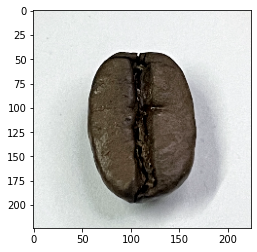

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("train/Dark/dark (1).png")

array([[[227, 230, 228],
        [233, 236, 234],
        [226, 229, 227],
        ...,
        [239, 241, 241],
        [235, 235, 235],
        [233, 236, 235]],

       [[225, 228, 225],
        [234, 237, 235],
        [227, 231, 228],
        ...,
        [237, 239, 239],
        [240, 240, 240],
        [238, 240, 240]],

       [[228, 232, 229],
        [230, 233, 230],
        [227, 231, 228],
        ...,
        [237, 239, 239],
        [235, 238, 237],
        [239, 242, 241]],

       ...,

       [[239, 240, 237],
        [235, 236, 234],
        [240, 241, 238],
        ...,
        [239, 238, 236],
        [236, 234, 232],
        [237, 235, 233]],

       [[228, 230, 225],
        [236, 238, 233],
        [232, 233, 228],
        ...,
        [239, 238, 236],
        [239, 238, 236],
        [237, 236, 234]],

       [[230, 232, 227],
        [227, 228, 224],
        [235, 237, 232],
        ...,
        [237, 236, 234],
        [238, 237, 235],
        [236, 235, 233]]

In [5]:
cv2.imread("train/Dark/dark (1).png").shape

(224, 224, 3)

# height,width,colors

In [6]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [7]:
train_dataset = train.flow_from_directory("train/",
                                         target_size =(128,128),
                                         batch_size = 1,
                                         class_mode = 'categorical',
                                         color_mode='rgb',
                                         )

# alt test_dataset I'should make an alias
validation_dataset = train.flow_from_directory("test/",
                                         target_size =(128,128),
                                         batch_size = 1,
                                         class_mode = 'categorical',
                                         color_mode='rgb')

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [8]:
train_dataset.class_indices

{'Dark': 0, 'Green': 1, 'Light': 2, 'Medium': 3}

In [9]:
class_indices = train_dataset.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

In [10]:
print(class_indices)

{0: 'Dark', 1: 'Green', 2: 'Light', 3: 'Medium'}


In [11]:
# 9:30 y_test = true_classes, x_train = train_dataset, X_test = validation_dataset

In [12]:
test_data_gen = ImageDataGenerator(rescale = 1/255.)

testgen = test_data_gen.flow_from_directory("test/",
                                         target_size =(128,128),
                                         batch_size = 1,
                                         class_mode = None,
                                         shuffle=False,
                                         seed=42)

Found 400 images belonging to 4 classes.


In [13]:
type(train_dataset)

keras.preprocessing.image.DirectoryIterator

In [14]:
train_dataset[0]

(array([[[[0.8235295 , 0.82745105, 0.854902  ],
          [0.8470589 , 0.8588236 , 0.882353  ],
          [0.7490196 , 0.76470596, 0.7843138 ],
          ...,
          [0.83921576, 0.8470589 , 0.85098046],
          [0.81568635, 0.8235295 , 0.8313726 ],
          [0.85098046, 0.86666673, 0.8705883 ]],
 
         [[0.8588236 , 0.8745099 , 0.8941177 ],
          [0.7803922 , 0.7960785 , 0.8196079 ],
          [0.87843144, 0.8941177 , 0.91372555],
          ...,
          [0.83921576, 0.8470589 , 0.85098046],
          [0.8235295 , 0.8313726 , 0.83921576],
          [0.87843144, 0.8862746 , 0.8941177 ]],
 
         [[0.85098046, 0.86666673, 0.8862746 ],
          [0.8588236 , 0.8745099 , 0.8941177 ],
          [0.8745099 , 0.89019614, 0.909804  ],
          ...,
          [0.83921576, 0.8470589 , 0.85098046],
          [0.882353  , 0.89019614, 0.8980393 ],
          [0.854902  , 0.86274517, 0.8705883 ]],
 
         ...,
 
         [[0.7843138 , 0.7960785 , 0.8196079 ],
          [0.84705

In [15]:
encoder_input = keras.Input(shape=(128,128,3), name="img")
x = keras.layers.Flatten()(encoder_input)

encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input,encoder_output, name="encoder")

decoder_input = keras.layers.Dense(64, activation = "relu")(encoder_output)
x = keras.layers.Dense(49152, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((128,128,3))(x)

opt = keras.optimizers.Adam(lr=0.001,decay =1e-6)

autoencoder = keras.Model(encoder_input, decoder_output,name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 128, 128, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3145792   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 49152)             3194880   
_________________________________________________________________
reshape (Reshape)            (None, 128, 128, 3)       0         
Total params: 6,344,832
Trainable params: 6,344,832
Non-trainable params: 0
_____________________________________________

/home/kotmin/Semestr_5/venv/lib64/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
# Dostaliśmy wektor z 49152. wartościami, z sarmacką fantazją przekształcimy
#to w kolorowy obrazek 128x128. Co może pójść nie tak?

In [17]:
# Znalazłem już odpowiedź na to pytanie stąd zmiany w kodzie.

In [18]:
# W train dataset tak na prawde mamy iterator, a pod nim touple w ktorym: 
# train_dataset[_][0] - x
#train_dataset[_][1] - y

In [19]:
np.squeeze(train_dataset[0][0]).shape

(128, 128, 3)

In [20]:
a = np.empty(shape=(1200,128,128,3),dtype=float)
for i in range(0,1200):
    a[i] = np.squeeze(train_dataset[i][0])

In [21]:
a.shape

x_train = a

In [22]:
# Teraz nalezałoby się zająć x_test

In [23]:
x_test = np.empty(shape=(400,128,128,3),dtype=float)
for i in range(0,400):
    x_test[i] = np.squeeze(validation_dataset[i][0])

In [24]:
x_test.shape

(400, 128, 128, 3)

In [25]:
autoencoder.compile(opt,loss="mse")
autoencoder.fit(x_train,x_train,epochs=2000,batch_size=32,validation_split=0.1)

Epoch 1/2000
34/34 [==============================] - 6s 163ms/step - loss: 0.2214 - val_loss: 0.1557
Epoch 2/2000
34/34 [==============================] - 6s 178ms/step - loss: 0.1550 - val_loss: 0.1508
Epoch 3/2000
34/34 [==============================] - 5s 159ms/step - loss: 0.1506 - val_loss: 0.1464
Epoch 4/2000
34/34 [==============================] - 5s 152ms/step - loss: 0.1453 - val_loss: 0.1387
Epoch 5/2000
34/34 [==============================] - 4s 123ms/step - loss: 0.1366 - val_loss: 0.1306
Epoch 6/2000
34/34 [==============================] - 4s 124ms/step - loss: 0.1300 - val_loss: 0.1255
Epoch 7/2000
34/34 [==============================] - 4s 109ms/step - loss: 0.1259 - val_loss: 0.1233
Epoch 8/2000
34/34 [==============================] - 4s 123ms/step - loss: 0.1249 - val_loss: 0.1217
Epoch 9/2000
34/34 [==============================] - 4s 108ms/step - loss: 0.1229 - val_loss: 0.1207
Epoch 10/2000
34/34 [==============================] - 4s 112ms/step - loss: 0.122

34/34 [==============================] - 4s 109ms/step - loss: 0.0578 - val_loss: 0.0575
Epoch 81/2000
34/34 [==============================] - 4s 105ms/step - loss: 0.0570 - val_loss: 0.0570
Epoch 82/2000
34/34 [==============================] - 4s 109ms/step - loss: 0.0563 - val_loss: 0.0563
Epoch 83/2000
34/34 [==============================] - 4s 105ms/step - loss: 0.0557 - val_loss: 0.0558
Epoch 84/2000
34/34 [==============================] - 3s 103ms/step - loss: 0.0555 - val_loss: 0.0558
Epoch 85/2000
34/34 [==============================] - 3s 102ms/step - loss: 0.0554 - val_loss: 0.0562
Epoch 86/2000
34/34 [==============================] - 4s 106ms/step - loss: 0.0552 - val_loss: 0.0550
Epoch 87/2000
34/34 [==============================] - 4s 102ms/step - loss: 0.0543 - val_loss: 0.0549
Epoch 88/2000
34/34 [==============================] - 4s 108ms/step - loss: 0.0534 - val_loss: 0.0535
Epoch 89/2000
34/34 [==============================] - 3s 103ms/step - loss: 0.0528 - v

34/34 [==============================] - 3s 94ms/step - loss: 0.0361 - val_loss: 0.0376
Epoch 160/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0361 - val_loss: 0.0385
Epoch 161/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0362 - val_loss: 0.0378
Epoch 162/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0362 - val_loss: 0.0374
Epoch 163/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0358 - val_loss: 0.0377
Epoch 164/2000
34/34 [==============================] - 3s 94ms/step - loss: 0.0355 - val_loss: 0.0373
Epoch 165/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0357 - val_loss: 0.0370
Epoch 166/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0354 - val_loss: 0.0368
Epoch 167/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0352 - val_loss: 0.0370
Epoch 168/2000
34/34 [==============================] - 3s 94ms/step - loss: 0.0353 - va

34/34 [==============================] - 3s 92ms/step - loss: 0.0302 - val_loss: 0.0322
Epoch 239/2000
34/34 [==============================] - 3s 97ms/step - loss: 0.0299 - val_loss: 0.0323
Epoch 240/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0301 - val_loss: 0.0323
Epoch 241/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0300 - val_loss: 0.0323
Epoch 242/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0299 - val_loss: 0.0321
Epoch 243/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0297 - val_loss: 0.0321
Epoch 244/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0300 - val_loss: 0.0321
Epoch 245/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0296 - val_loss: 0.0324
Epoch 246/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0296 - val_loss: 0.0315
Epoch 247/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0301 - va

34/34 [==============================] - 3s 91ms/step - loss: 0.0259 - val_loss: 0.0283
Epoch 318/2000
34/34 [==============================] - 4s 104ms/step - loss: 0.0259 - val_loss: 0.0289
Epoch 319/2000
34/34 [==============================] - 3s 99ms/step - loss: 0.0259 - val_loss: 0.0284
Epoch 320/2000
34/34 [==============================] - 3s 95ms/step - loss: 0.0258 - val_loss: 0.0288
Epoch 321/2000
34/34 [==============================] - 3s 95ms/step - loss: 0.0260 - val_loss: 0.0284
Epoch 322/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0257 - val_loss: 0.0283
Epoch 323/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0258 - val_loss: 0.0291
Epoch 324/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0262 - val_loss: 0.0283
Epoch 325/2000
34/34 [==============================] - 3s 85ms/step - loss: 0.0257 - val_loss: 0.0282
Epoch 326/2000
34/34 [==============================] - 3s 81ms/step - loss: 0.0257 - v

34/34 [==============================] - 3s 89ms/step - loss: 0.0236 - val_loss: 0.0266
Epoch 397/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0235 - val_loss: 0.0261
Epoch 398/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0235 - val_loss: 0.0265
Epoch 399/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0232 - val_loss: 0.0263
Epoch 400/2000
34/34 [==============================] - 3s 99ms/step - loss: 0.0231 - val_loss: 0.0264
Epoch 401/2000
34/34 [==============================] - 3s 95ms/step - loss: 0.0233 - val_loss: 0.0264
Epoch 402/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0235 - val_loss: 0.0260
Epoch 403/2000
34/34 [==============================] - 3s 94ms/step - loss: 0.0232 - val_loss: 0.0261
Epoch 404/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0233 - val_loss: 0.0262
Epoch 405/2000
34/34 [==============================] - 3s 99ms/step - loss: 0.0233 - va

34/34 [==============================] - 4s 115ms/step - loss: 0.0215 - val_loss: 0.0249
Epoch 476/2000
34/34 [==============================] - 4s 118ms/step - loss: 0.0216 - val_loss: 0.0250
Epoch 477/2000
34/34 [==============================] - 4s 119ms/step - loss: 0.0224 - val_loss: 0.0259
Epoch 478/2000
34/34 [==============================] - 4s 121ms/step - loss: 0.0220 - val_loss: 0.0254
Epoch 479/2000
34/34 [==============================] - 4s 115ms/step - loss: 0.0221 - val_loss: 0.0247
Epoch 480/2000
34/34 [==============================] - 4s 121ms/step - loss: 0.0220 - val_loss: 0.0249
Epoch 481/2000
34/34 [==============================] - 4s 126ms/step - loss: 0.0217 - val_loss: 0.0246
Epoch 482/2000
34/34 [==============================] - 4s 123ms/step - loss: 0.0216 - val_loss: 0.0246
Epoch 483/2000
34/34 [==============================] - 4s 115ms/step - loss: 0.0215 - val_loss: 0.0247
Epoch 484/2000
34/34 [==============================] - 4s 122ms/step - loss: 0

34/34 [==============================] - 3s 88ms/step - loss: 0.0199 - val_loss: 0.0232
Epoch 555/2000
34/34 [==============================] - 3s 96ms/step - loss: 0.0199 - val_loss: 0.0230
Epoch 556/2000
34/34 [==============================] - 3s 99ms/step - loss: 0.0199 - val_loss: 0.0237
Epoch 557/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0199 - val_loss: 0.0232
Epoch 558/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0199 - val_loss: 0.0234
Epoch 559/2000
34/34 [==============================] - 3s 98ms/step - loss: 0.0202 - val_loss: 0.0236
Epoch 560/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0204 - val_loss: 0.0232
Epoch 561/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0200 - val_loss: 0.0241
Epoch 562/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0202 - val_loss: 0.0234
Epoch 563/2000
34/34 [==============================] - 3s 95ms/step - loss: 0.0204 - va

34/34 [==============================] - 3s 85ms/step - loss: 0.0190 - val_loss: 0.0228
Epoch 634/2000
34/34 [==============================] - 3s 80ms/step - loss: 0.0190 - val_loss: 0.0223
Epoch 635/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0195 - val_loss: 0.0233
Epoch 636/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0193 - val_loss: 0.0224
Epoch 637/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0190 - val_loss: 0.0223
Epoch 638/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0190 - val_loss: 0.0225
Epoch 639/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0193 - val_loss: 0.0230
Epoch 640/2000
34/34 [==============================] - 3s 81ms/step - loss: 0.0191 - val_loss: 0.0224
Epoch 641/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0190 - val_loss: 0.0223
Epoch 642/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0190 - va

34/34 [==============================] - 3s 82ms/step - loss: 0.0181 - val_loss: 0.0217
Epoch 713/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0179 - val_loss: 0.0216
Epoch 714/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0181 - val_loss: 0.0213
Epoch 715/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0179 - val_loss: 0.0216
Epoch 716/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0179 - val_loss: 0.0215
Epoch 717/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0179 - val_loss: 0.0215
Epoch 718/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0179 - val_loss: 0.0215
Epoch 719/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0182 - val_loss: 0.0224
Epoch 720/2000
34/34 [==============================] - 3s 85ms/step - loss: 0.0182 - val_loss: 0.0216
Epoch 721/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0183 - va

34/34 [==============================] - 3s 89ms/step - loss: 0.0171 - val_loss: 0.0210
Epoch 792/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0172 - val_loss: 0.0211
Epoch 793/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0172 - val_loss: 0.0210
Epoch 794/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0174 - val_loss: 0.0208
Epoch 795/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0173 - val_loss: 0.0210
Epoch 796/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0173 - val_loss: 0.0211
Epoch 797/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0173 - val_loss: 0.0212
Epoch 798/2000
34/34 [==============================] - 3s 94ms/step - loss: 0.0172 - val_loss: 0.0211
Epoch 799/2000
34/34 [==============================] - 3s 94ms/step - loss: 0.0174 - val_loss: 0.0211
Epoch 800/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0175 - va

34/34 [==============================] - 3s 91ms/step - loss: 0.0163 - val_loss: 0.0201
Epoch 871/2000
34/34 [==============================] - 3s 95ms/step - loss: 0.0162 - val_loss: 0.0200
Epoch 872/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0163 - val_loss: 0.0208
Epoch 873/2000
34/34 [==============================] - 3s 82ms/step - loss: 0.0164 - val_loss: 0.0210
Epoch 874/2000
34/34 [==============================] - 3s 94ms/step - loss: 0.0162 - val_loss: 0.0201
Epoch 875/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0161 - val_loss: 0.0201
Epoch 876/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0163 - val_loss: 0.0202
Epoch 877/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0164 - val_loss: 0.0204
Epoch 878/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0163 - val_loss: 0.0205
Epoch 879/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0162 - va

34/34 [==============================] - 3s 90ms/step - loss: 0.0159 - val_loss: 0.0199
Epoch 950/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0157 - val_loss: 0.0198
Epoch 951/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0158 - val_loss: 0.0197
Epoch 952/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0157 - val_loss: 0.0200
Epoch 953/2000
34/34 [==============================] - 3s 94ms/step - loss: 0.0158 - val_loss: 0.0202
Epoch 954/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0162 - val_loss: 0.0201
Epoch 955/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0162 - val_loss: 0.0201
Epoch 956/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0157 - val_loss: 0.0197
Epoch 957/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0157 - val_loss: 0.0199
Epoch 958/2000
34/34 [==============================] - 3s 95ms/step - loss: 0.0159 - va

34/34 [==============================] - 3s 87ms/step - loss: 0.0153 - val_loss: 0.0198
Epoch 1029/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0153 - val_loss: 0.0199
Epoch 1030/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0156 - val_loss: 0.0202
Epoch 1031/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0156 - val_loss: 0.0202
Epoch 1032/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0155 - val_loss: 0.0196
Epoch 1033/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0155 - val_loss: 0.0194
Epoch 1034/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0158 - val_loss: 0.0200
Epoch 1035/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0155 - val_loss: 0.0194
Epoch 1036/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0154 - val_loss: 0.0197
Epoch 1037/2000
34/34 [==============================] - 3s 85ms/step - loss: 0.

Epoch 1107/2000
34/34 [==============================] - 3s 96ms/step - loss: 0.0150 - val_loss: 0.0191
Epoch 1108/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0151 - val_loss: 0.0194
Epoch 1109/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0151 - val_loss: 0.0195
Epoch 1110/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0154 - val_loss: 0.0193
Epoch 1111/2000
34/34 [==============================] - 3s 85ms/step - loss: 0.0151 - val_loss: 0.0196
Epoch 1112/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0152 - val_loss: 0.0198
Epoch 1113/2000
34/34 [==============================] - 3s 85ms/step - loss: 0.0161 - val_loss: 0.0194
Epoch 1114/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0153 - val_loss: 0.0196
Epoch 1115/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0154 - val_loss: 0.0199
Epoch 1116/2000
34/34 [==============================] - 3s 88ms

Epoch 1186/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0149 - val_loss: 0.0195
Epoch 1187/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0150 - val_loss: 0.0191
Epoch 1188/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0148 - val_loss: 0.0192
Epoch 1189/2000
34/34 [==============================] - 3s 94ms/step - loss: 0.0148 - val_loss: 0.0195
Epoch 1190/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0147 - val_loss: 0.0191
Epoch 1191/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0147 - val_loss: 0.0193
Epoch 1192/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0147 - val_loss: 0.0191
Epoch 1193/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0148 - val_loss: 0.0191
Epoch 1194/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0151 - val_loss: 0.0192
Epoch 1195/2000
34/34 [==============================] - 3s 91ms

Epoch 1265/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0146 - val_loss: 0.0191
Epoch 1266/2000
34/34 [==============================] - 3s 85ms/step - loss: 0.0146 - val_loss: 0.0196
Epoch 1267/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0146 - val_loss: 0.0190
Epoch 1268/2000
34/34 [==============================] - 3s 85ms/step - loss: 0.0144 - val_loss: 0.0192
Epoch 1269/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0145 - val_loss: 0.0190
Epoch 1270/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0145 - val_loss: 0.0187
Epoch 1271/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0147 - val_loss: 0.0194
Epoch 1272/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0151 - val_loss: 0.0195
Epoch 1273/2000
34/34 [==============================] - 3s 94ms/step - loss: 0.0153 - val_loss: 0.0198
Epoch 1274/2000
34/34 [==============================] - 3s 89ms

Epoch 1344/2000
34/34 [==============================] - 3s 98ms/step - loss: 0.0148 - val_loss: 0.0194
Epoch 1345/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0145 - val_loss: 0.0190
Epoch 1346/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0144 - val_loss: 0.0188
Epoch 1347/2000
34/34 [==============================] - 3s 98ms/step - loss: 0.0145 - val_loss: 0.0194
Epoch 1348/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0148 - val_loss: 0.0192
Epoch 1349/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0148 - val_loss: 0.0191
Epoch 1350/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0147 - val_loss: 0.0192
Epoch 1351/2000
34/34 [==============================] - 3s 94ms/step - loss: 0.0146 - val_loss: 0.0193
Epoch 1352/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0145 - val_loss: 0.0188
Epoch 1353/2000
34/34 [==============================] - 3s 90ms

Epoch 1423/2000
34/34 [==============================] - 3s 85ms/step - loss: 0.0142 - val_loss: 0.0188
Epoch 1424/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0143 - val_loss: 0.0190
Epoch 1425/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0143 - val_loss: 0.0189
Epoch 1426/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0142 - val_loss: 0.0190
Epoch 1427/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0142 - val_loss: 0.0190
Epoch 1428/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0143 - val_loss: 0.0188
Epoch 1429/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0147 - val_loss: 0.0188
Epoch 1430/2000
34/34 [==============================] - 3s 97ms/step - loss: 0.0145 - val_loss: 0.0192
Epoch 1431/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0145 - val_loss: 0.0191
Epoch 1432/2000
34/34 [==============================] - 3s 97ms

Epoch 1502/2000
34/34 [==============================] - 3s 85ms/step - loss: 0.0161 - val_loss: 0.0203
Epoch 1503/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0151 - val_loss: 0.0188
Epoch 1504/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0145 - val_loss: 0.0190
Epoch 1505/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0142 - val_loss: 0.0187
Epoch 1506/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0141 - val_loss: 0.0186
Epoch 1507/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0139 - val_loss: 0.0186
Epoch 1508/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0141 - val_loss: 0.0188
Epoch 1509/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0145 - val_loss: 0.0186
Epoch 1510/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0144 - val_loss: 0.0185
Epoch 1511/2000
34/34 [==============================] - 3s 87ms

34/34 [==============================] - 3s 86ms/step - loss: 0.0140 - val_loss: 0.0188
Epoch 1581/2000
34/34 [==============================] - 3s 95ms/step - loss: 0.0142 - val_loss: 0.0196
Epoch 1582/2000
34/34 [==============================] - 3s 94ms/step - loss: 0.0142 - val_loss: 0.0186
Epoch 1583/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0142 - val_loss: 0.0189
Epoch 1584/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0141 - val_loss: 0.0189
Epoch 1585/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0142 - val_loss: 0.0187
Epoch 1586/2000
34/34 [==============================] - 3s 96ms/step - loss: 0.0143 - val_loss: 0.0192
Epoch 1587/2000
34/34 [==============================] - 3s 97ms/step - loss: 0.0140 - val_loss: 0.0188
Epoch 1588/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0145 - val_loss: 0.0190
Epoch 1589/2000
34/34 [==============================] - 3s 94ms/step - loss: 0.

Epoch 1659/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0143 - val_loss: 0.0189
Epoch 1660/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0140 - val_loss: 0.0189
Epoch 1661/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0138 - val_loss: 0.0183
Epoch 1662/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0139 - val_loss: 0.0190
Epoch 1663/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0141 - val_loss: 0.0185
Epoch 1664/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0139 - val_loss: 0.0185
Epoch 1665/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0138 - val_loss: 0.0187
Epoch 1666/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0138 - val_loss: 0.0190
Epoch 1667/2000
34/34 [==============================] - 3s 96ms/step - loss: 0.0139 - val_loss: 0.0186
Epoch 1668/2000
34/34 [==============================] - 3s 90ms

Epoch 1738/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0139 - val_loss: 0.0187
Epoch 1739/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0143 - val_loss: 0.0186
Epoch 1740/2000
34/34 [==============================] - 3s 92ms/step - loss: 0.0137 - val_loss: 0.0185
Epoch 1741/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0137 - val_loss: 0.0186
Epoch 1742/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0143 - val_loss: 0.0189
Epoch 1743/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0140 - val_loss: 0.0184
Epoch 1744/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0137 - val_loss: 0.0187
Epoch 1745/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0137 - val_loss: 0.0186
Epoch 1746/2000
34/34 [==============================] - 3s 91ms/step - loss: 0.0137 - val_loss: 0.0184
Epoch 1747/2000
34/34 [==============================] - 3s 95ms

Epoch 1817/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0138 - val_loss: 0.0184
Epoch 1818/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0137 - val_loss: 0.0194
Epoch 1819/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0140 - val_loss: 0.0192
Epoch 1820/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0137 - val_loss: 0.0189
Epoch 1821/2000
34/34 [==============================] - 3s 90ms/step - loss: 0.0137 - val_loss: 0.0187
Epoch 1822/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0139 - val_loss: 0.0200
Epoch 1823/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0142 - val_loss: 0.0186
Epoch 1824/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0138 - val_loss: 0.0190
Epoch 1825/2000
34/34 [==============================] - 3s 82ms/step - loss: 0.0139 - val_loss: 0.0189
Epoch 1826/2000
34/34 [==============================] - 3s 83ms

Epoch 1896/2000
34/34 [==============================] - 3s 94ms/step - loss: 0.0136 - val_loss: 0.0190
Epoch 1897/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0137 - val_loss: 0.0185
Epoch 1898/2000
34/34 [==============================] - 3s 87ms/step - loss: 0.0140 - val_loss: 0.0187
Epoch 1899/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0137 - val_loss: 0.0186
Epoch 1900/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0136 - val_loss: 0.0184
Epoch 1901/2000
34/34 [==============================] - 3s 94ms/step - loss: 0.0136 - val_loss: 0.0185
Epoch 1902/2000
34/34 [==============================] - 3s 83ms/step - loss: 0.0135 - val_loss: 0.0187
Epoch 1903/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0136 - val_loss: 0.0184
Epoch 1904/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0140 - val_loss: 0.0189
Epoch 1905/2000
34/34 [==============================] - 3s 86ms

Epoch 1975/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0136 - val_loss: 0.0182
Epoch 1976/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0135 - val_loss: 0.0191
Epoch 1977/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0136 - val_loss: 0.0184
Epoch 1978/2000
34/34 [==============================] - 3s 84ms/step - loss: 0.0140 - val_loss: 0.0190
Epoch 1979/2000
34/34 [==============================] - 3s 88ms/step - loss: 0.0147 - val_loss: 0.0192
Epoch 1980/2000
34/34 [==============================] - 3s 85ms/step - loss: 0.0139 - val_loss: 0.0187
Epoch 1981/2000
34/34 [==============================] - 3s 86ms/step - loss: 0.0136 - val_loss: 0.0183
Epoch 1982/2000
34/34 [==============================] - 3s 89ms/step - loss: 0.0135 - val_loss: 0.0183
Epoch 1983/2000
34/34 [==============================] - 3s 93ms/step - loss: 0.0134 - val_loss: 0.0183
Epoch 1984/2000
34/34 [==============================] - 3s 86ms

In [26]:
# Sprawdzmy czy to nam zadziala

In [34]:
example = encoder.predict([x_test[2].reshape(-1,128,128,3)])[0]

print(example)

[ 0.        0.        0.        0.        0.        0.        0.
  0.       68.230835  0.       71.1049    0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.       45.655975 28.22429   0.
  0.      ]


In [28]:
example.shape

(64,)

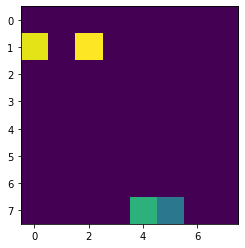

In [35]:
plt.imshow(example.reshape((8,8)))

In [30]:
# Oki tak wygląda wygenerowany przez nas chunk, troszkę mu jeszcze brakuje żeby nawet z daleka
# zaczął przypominać ziarno

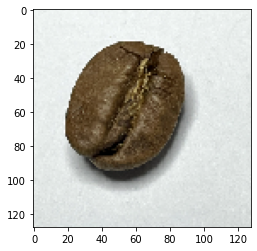

In [31]:
plt.imshow(x_test[2])

In [36]:
ae_out = autoencoder.predict([x_test[2].reshape(-1,128,128,3)])[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


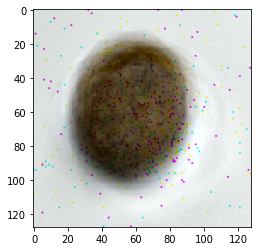

In [38]:
plt.imshow(ae_out)

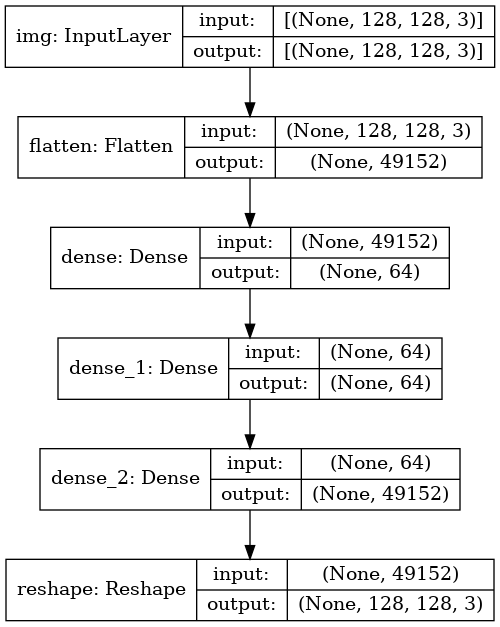

In [39]:
tf.keras.utils.plot_model(autoencoder, show_shapes=True)